In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

2024-06-10 15:36:57.325772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataX=np.load('Facial expression.npy')
dataY=np.load('Facial expression label.npy')

In [3]:
dataX

array([[[[216, 216, 216],
         [149, 149, 149],
         [158, 158, 158],
         ...,
         [177, 177, 177],
         [183, 183, 183],
         [178, 178, 178]],

        [[181, 181, 181],
         [157, 157, 157],
         [172, 172, 172],
         ...,
         [179, 179, 179],
         [188, 188, 188],
         [185, 185, 185]],

        [[157, 157, 157],
         [167, 167, 167],
         [170, 170, 170],
         ...,
         [180, 180, 180],
         [188, 188, 188],
         [188, 188, 188]],

        ...,

        [[157, 157, 157],
         [162, 162, 162],
         [165, 165, 165],
         ...,
         [235, 235, 235],
         [238, 238, 238],
         [240, 240, 240]],

        [[159, 159, 159],
         [163, 163, 163],
         [163, 163, 163],
         ...,
         [236, 236, 236],
         [237, 237, 237],
         [238, 238, 238]],

        [[157, 157, 157],
         [159, 159, 159],
         [160, 160, 160],
         ...,
         [236, 236, 236],
        

In [4]:
dataY

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [5]:
dataX.shape

(19950, 48, 48, 3)

In [6]:
dataY.shape

(19950, 4)

In [7]:
Name=['Angry','Happy','Neutral','Surprise']
N=list(range(len(Name)))   
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 
print(normal_mapping)

{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Surprise': 3}


In [8]:
dataY2=[]
for y in tqdm(dataY):
    dataY2+=[list(y).index(1)]
print(dataY2[0:100])

  0%|          | 0/19950 [00:00<?, ?it/s]

100%|██████████| 19950/19950 [00:00<00:00, 76966.79it/s]

[3, 3, 2, 1, 3, 1, 1, 0, 3, 2, 0, 1, 1, 0, 3, 1, 2, 3, 1, 2, 3, 3, 2, 0, 1, 2, 3, 1, 0, 1, 2, 0, 1, 1, 1, 1, 3, 0, 0, 3, 2, 0, 3, 1, 0, 1, 1, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 0, 3, 3]


In [9]:
m=len(dataX)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

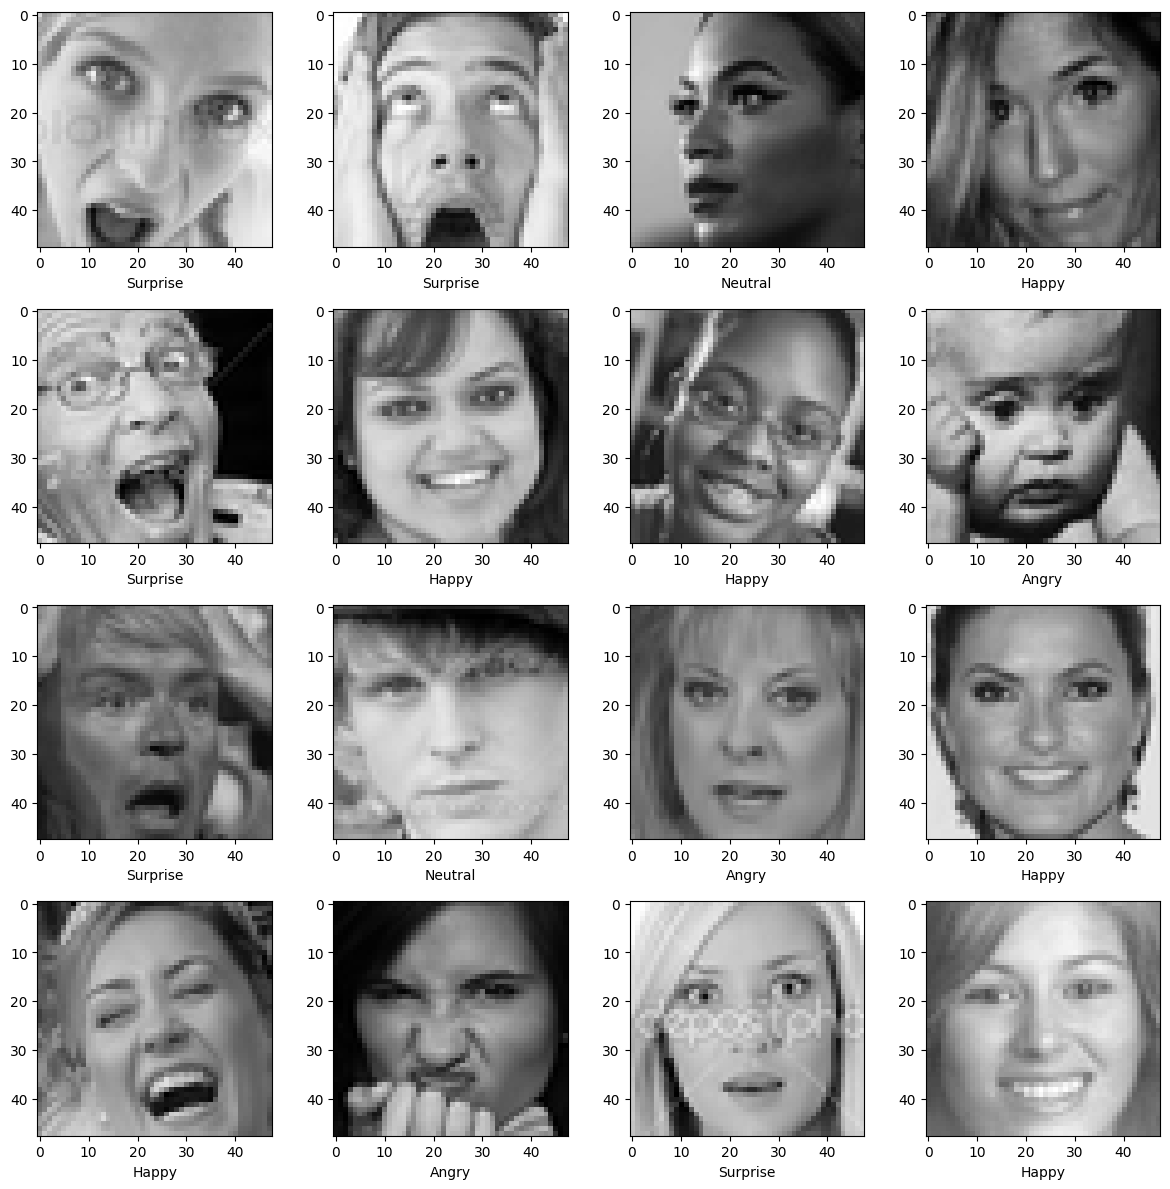

In [10]:
plt.subplots(4,4, figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xlabel(reverse_mapping[dataY2[i]])
    plt.imshow(dataX[i])
plt.tight_layout()
plt.show()

In [11]:
trainX=dataX[M[0:4*(m//5)]]
testX=dataX[M[4*(m//5):]]
trainY=dataY[M[0:4*(m//5)]]
testY=dataY[M[4*(m//5):]]

In [12]:
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [15]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(48,48,3),include_top=False,
                        weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [16]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10


2024-06-10 15:37:13.848999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


399/399 [==============================] - 152s 341ms/step - loss: 1.3984 - accuracy: 0.3697 - val_loss: 1.2800 - val_accuracy: 0.4054
Epoch 2/10
399/399 [==============================] - 127s 319ms/step - loss: 1.2656 - accuracy: 0.4212 - val_loss: 1.2561 - val_accuracy: 0.4138
Epoch 3/10
399/399 [==============================] - 135s 339ms/step - loss: 1.2615 - accuracy: 0.4235 - val_loss: 1.2712 - val_accuracy: 0.4138
Epoch 4/10
399/399 [==============================] - 128s 322ms/step - loss: 1.2503 - accuracy: 0.4254 - val_loss: 1.2295 - val_accuracy: 0.4305
Epoch 5/10
399/399 [==============================] - 124s 310ms/step - loss: 1.2377 - accuracy: 0.4408 - val_loss: 1.1902 - val_accuracy: 0.4543
Epoch 6/10
399/399 [==============================] - 132s 332ms/step - loss: 1.2359 - accuracy: 0.4401 - val_loss: 1.2115 - val_accuracy: 0.4364
Epoch 7/10
399/399 [==============================] - 143s 359ms/step - loss: 1.2336 - accuracy: 0.4399 - val_loss: 1.1960 - val_accura

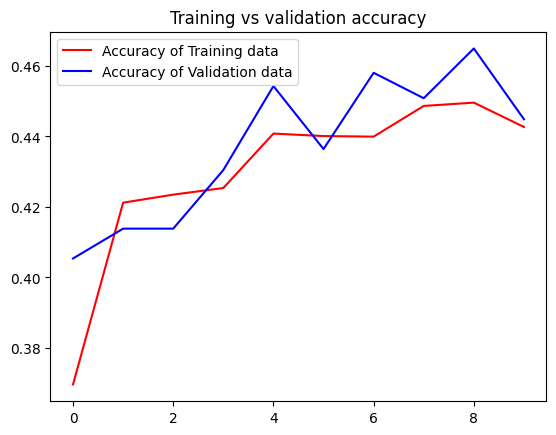

<Figure size 640x480 with 0 Axes>

In [19]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

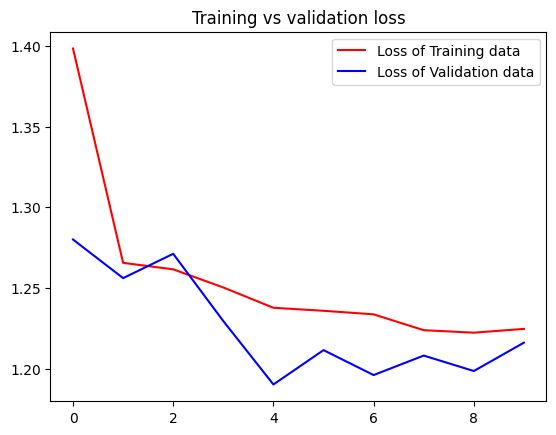

<Figure size 640x480 with 0 Axes>

In [20]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [21]:
model.save('emotion_detector')

INFO:tensorflow:Assets written to: emotion_detector/assets


INFO:tensorflow:Assets written to: emotion_detector/assets
